In [15]:
from datetime import datetime
from pathlib import Path
import importlib
import win32com.client
import warnings
import os
warnings.filterwarnings("ignore")  # Oculta todos los warnings

# Mis modulos
import file_management as fm
import file_processing as fp
import graphics_settings as gs
import generate_html as gh

In [16]:
months = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 
    11: 'Noviembre', 12: 'Diciembre'
}
contratos = {
    "name": "Control contratos",
    "file_name": "Control Contratos.xlsx",
    "sheet_name": "DATOS",
    "relevant_columns": [
        'TRABAJADOR',
        'NRODOCIDEN',
        'FECINGRESO_A',
        'TIPO_CONTRATO',
        'FECHAFINCONTRATO',
    ],
    "reports": [
        "PERSONA"
    ]
}

# Listas

# Constantes
project_address = r"C:\Informacion\Otros\RRHH\Automatizacion\contract_alert"
graphic_name = 'contratos_cerca_a_finalizar.png'

In [17]:
importlib.reload(fm)

df = fm.main(os.path.join(project_address, contratos['file_name']), contratos)

In [18]:
importlib.reload(fp)

df = fp.main(df)

### Reportes

'POR NECESEIDADES DEL MERCADO' y 'A PLAZO INDETERMINADO'

In [19]:
df_determined = df[df['TIPO_CONTRATO'] == 'POR NECESIDADES DEL MERCADO']
df_indetermined = df[df['TIPO_CONTRATO'] == 'A PLAZO INDETERMINADO']

### Contrato determinado

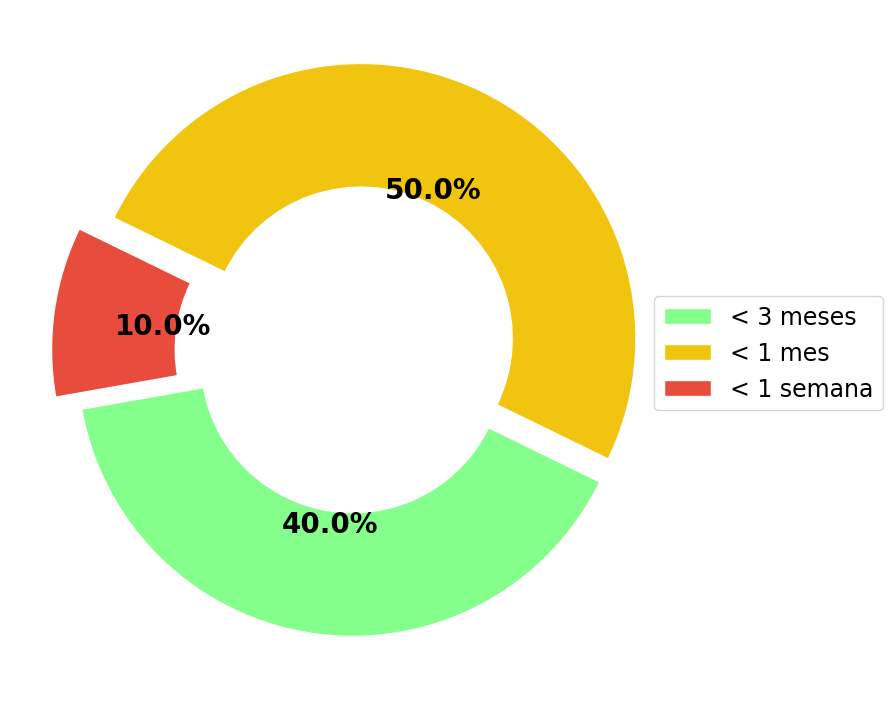

In [20]:
importlib.reload(gs)
importlib.reload(fp)

df_determined = fp.calculate_left_days(df_determined)
gs.main(project_address, graphic_name, df_determined, contratos)

In [21]:
importlib.reload(gh)

html = gh.generar_html_responsive_final(df_determined, os.path.join(project_address, graphic_name))

with open('reporte_contratos.html', 'w', encoding='utf-8') as f:
    f.write(html)

### Contrato indeterminado